In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_finance = pd.read_excel('zippedData/df_Movie_Financials.xlsx')
df_nofinance = pd.read_excel('zippedData/df_Generes_With_tconst.xlsx')
df_IMDB = pd.read_excel('zippedData/df_IMDB_MovieCatalog.xlsx')
df_RottenTomatoes = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [176]:
# Investigate the Data
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 17 columns):
Unnamed: 0          5540 non-null int64
tconst              5540 non-null object
P_Cost              5540 non-null float64
Dom_Gross           5540 non-null int64
Frgn_Gross          5540 non-null int64
WW_Gross            5540 non-null int64
Domestic Opening    5540 non-null int64
year                5540 non-null int64
TicketPrice         5540 non-null float64
EstInflation        5540 non-null float64
Multiplier          5540 non-null float64
adj_P_Cost          5540 non-null float64
adj_Frgn_Gross      5540 non-null float64
adj_WW_Gross        5540 non-null float64
Profits             5540 non-null float64
adj_Profits         5540 non-null float64
ROI                 5540 non-null float64
dtypes: float64(10), int64(6), object(1)
memory usage: 735.9+ KB


In [4]:
df_finance['ROI'] = df_finance['Profits']/df_finance['P_Cost']*100
df_finance['ROI']

0       233.535934
1       293.636120
2       668.487221
3       224.142105
4        -7.111232
           ...    
5535    -99.438074
5536    -99.478212
5537    -99.638762
5538    -99.813862
5539    -99.889120
Name: ROI, Length: 5540, dtype: float64

In [5]:
#ADDING A FUNCTION: "IS THIS MOVIE PROFITABLE?"
def percent_profitable(x):
    profitable = []
    not_profitable = []
    for movie in df_finance['adj_Profits']:
        if movie > 0:
            profitable.append(movie)
        else:
            not_profitable.append(movie)
    return len(profitable)/(len(profitable)+len(not_profitable))*100

In [6]:
percent_profitable(df_finance)

40.81227436823105

In [7]:
#CHANGING UNIT OF adj_Profits FROM DOLLARS TO MILLIONS OF DOLLARS
df_finance['adj_Profits_millions'] = df_finance['adj_Profits']/1000000

In [254]:
df_finance['adj_Profits_millions']

0        341.377801
1        128.769288
2       1104.213658
3         58.501714
4         -7.731374
           ...     
5535     -20.385110
5536     -20.393339
5537     -20.426252
5538     -20.462148
5539     -20.477576
Name: adj_Profits_millions, Length: 5540, dtype: float64

In [9]:
df_nofinance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189509 entries, 0 to 189508
Data columns (total 11 columns):
Unnamed: 0        189509 non-null int64
tconst            189509 non-null object
titleType         189509 non-null object
primaryTitle      189509 non-null object
originalTitle     189509 non-null object
startYear         189509 non-null int64
runtimeMinutes    189509 non-null int64
genres            189509 non-null object
averageRating     189509 non-null float64
numVotes          189509 non-null int64
Splitgeneres      189509 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 15.9+ MB


In [42]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 12 columns):
Unnamed: 0        31060 non-null int64
tconst            31060 non-null object
primaryTitle      31060 non-null object
startYear         31060 non-null int64
runtimeMinutes    31060 non-null int64
genres            31060 non-null object
startYear_str     31060 non-null int64
titleyear         31060 non-null object
studio_BOM        4560 non-null object
MPAA              2865 non-null object
rd                4560 non-null datetime64[ns]
StudioDesc        4057 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 2.8+ MB


In [11]:
df_RottenTomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


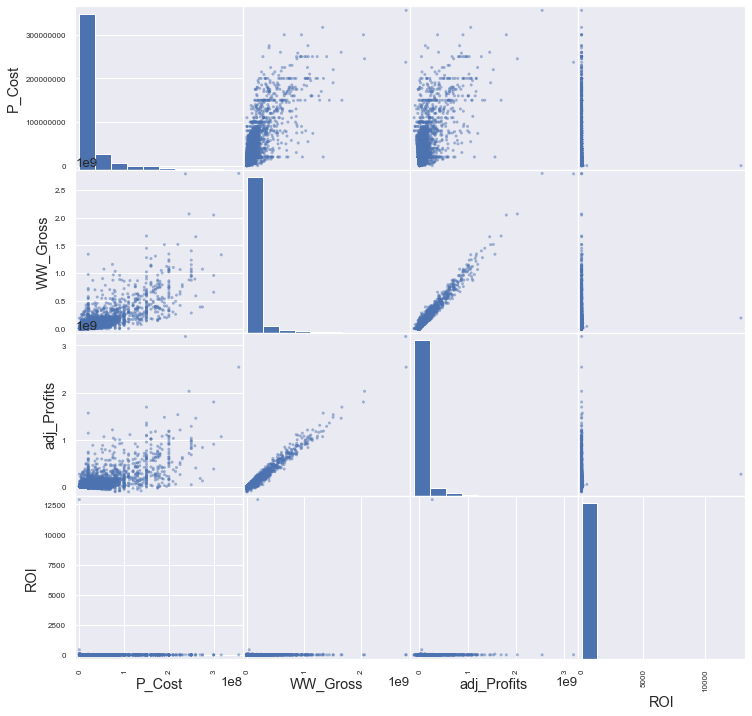

In [181]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df_finance[['P_Cost', 'WW_Gross', 'adj_Profits', 'ROI']], figsize=(12,12));

In [ ]:
# Comments: There is a very strong positive linear relationship between WW_Gross and profit.

In [205]:
df_finance['adj_Profits'].mean()

46142920.072355114

In [213]:
df_finance['adj_Profits'].mode()

0   -2.064382e+07
dtype: float64

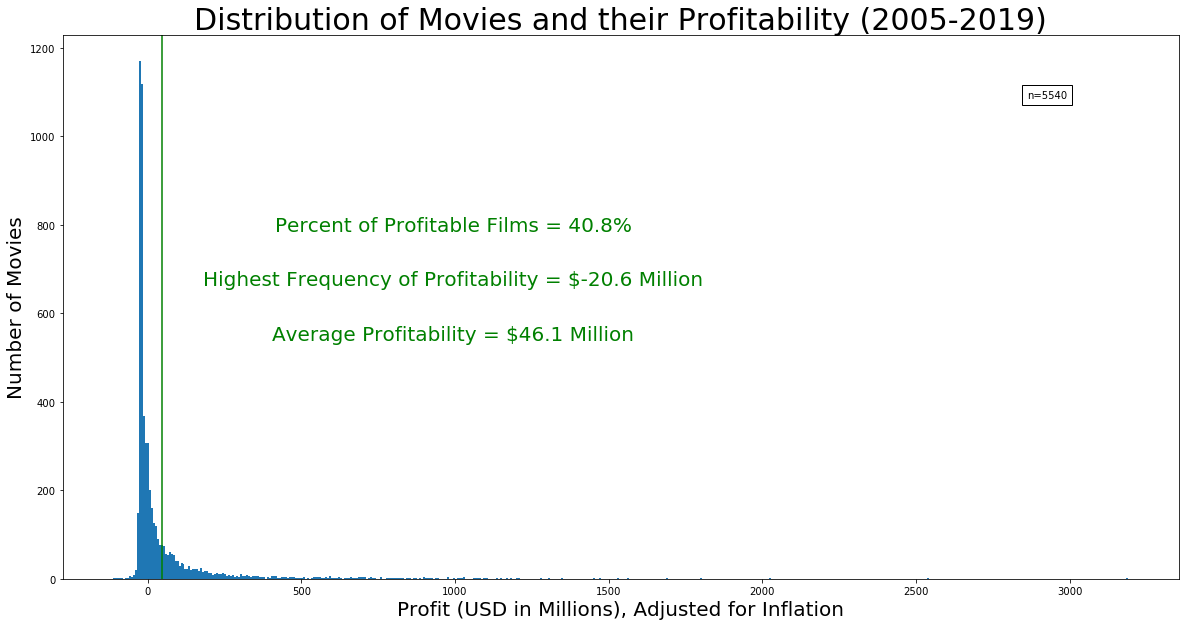

In [8]:
# Create a plot that shows the Distribution of Profit
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(df_finance['adj_Profits_millions'], bins='auto')
ax.set_title('Distribution of Movies and their Profitability (2005-2019)', fontsize=30)
ax.set_xlabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=20)
ax.axvline(df_finance['adj_Profits_millions'].mean(), color='green')
ax.text(0.35, 0.45, 'Average Profitability = $46.1 Million',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(0.35, 0.65, 'Percent of Profitable Films = 40.8%',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(0.35, 0.55, 'Highest Frequency of Profitability = $-20.6 Million',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='green',
        transform=ax.transAxes)
ax.text(.9, .9, 'n=5540', color='black',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='none', edgecolor='black', pad=5.0));

In [17]:
# COMMENTS: The movie industry is a an incredible platform to making profit.
# However, there are risks involved and we need to be smart in how we invest and design your next film.
# This histogram illustrates the distribution of films and how profitable they are.
# One takeaway that is important to note is while movies have the potential to make billions of dollars in profit,
# most (59.2%) films actually lose money. And on average, films generate only about $46 million.
# This study investigates the key factors that generate the highest profits.

In [30]:
df_nofinance[['tconst', 'genres', 'Splitgeneres']].head(40)

tconst                    genres Splitgeneres
0   tt0016906            Comedy,Musical       Comedy
1   tt0016906            Comedy,Musical      Musical
2   tt0062336                     Drama        Drama
3   tt0064322            Drama,Thriller        Drama
4   tt0064322            Drama,Thriller     Thriller
5   tt0065392               Documentary  Documentary
6   tt0069049                     Drama        Drama
7   tt0088751      Comedy,Horror,Sci-Fi       Comedy
8   tt0088751      Comedy,Horror,Sci-Fi       Horror
9   tt0088751      Comedy,Horror,Sci-Fi       Sci-Fi
10  tt0100275      Comedy,Drama,Fantasy       Comedy
11  tt0100275      Comedy,Drama,Fantasy        Drama
12  tt0100275      Comedy,Drama,Fantasy      Fantasy
13  tt0110476             Drama,Fantasy        Drama
14  tt0110476             Drama,Fantasy      Fantasy
15  tt0112502           Horror,Thriller       Horror
16  tt0112502           Horror,Thriller     Thriller
17  tt0115686            Comedy,Fantasy       Comedy
18  tt0115686            Comedy,Fantasy      Fantasy
19  tt0116991                     Drama        Drama
20  tt0117743             Drama,Romance        Drama
21  tt0117743             Drama,Romance      Romance
22  tt0118141                     Drama        Drama
23  tt0119231                    Comedy       Comedy
24  tt0119970       Comedy,Drama,Sci-Fi       Comedy
25  tt0119970       Comedy,Drama,Sci-Fi        Drama
26  tt0119970       Comedy,Drama,Sci-Fi       Sci-Fi
27  tt0120589                     Drama        Drama
28  tt0120667  Action,Adventure,Fantasy       Action
29  tt0120667  Action,Adventure,Fantasy    Adventure
30  tt0120667  Action,Adventure,Fantasy      Fantasy
31  tt0121164    Animation,Drama,Family    Animation
32  tt0121164    Animation,Drama,Family        Drama
33  tt0121164    Animation,Drama,Family       Family
34  tt0121766  Action,Adventure,Fantasy       Action
35  tt0121766  Action,Adventure,Fantasy    Adventure
36  tt0121766  Action,Adventure,Fantasy      Fantasy
37  tt0135986      Comedy,Drama,Romance       Comedy
38  tt0135986      Comedy,Drama,Romance        Drama
39  tt0135986      Comedy,Drama,Romance      Romance

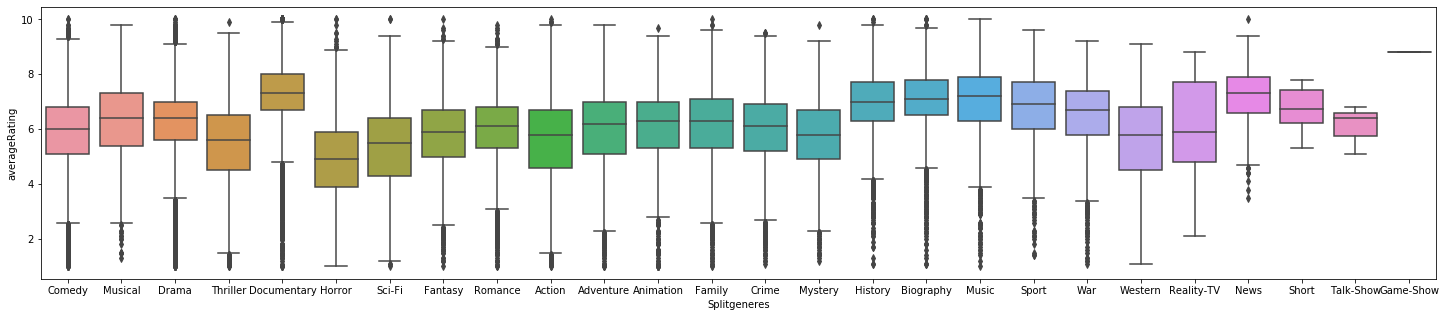

In [40]:
#boxplot of movie rating by genre
plt.figure(figsize=(25,5))
sns.boxplot(x="Splitgeneres", y="averageRating", data=df_nofinance);

In [53]:
df.head(40)

Unnamed: 0     tconst                                    primaryTitle  \
0            0  tt0069049                      The Other Side Of The Wind   
1            1  tt0100275                        The Wandering Soap Opera   
2            2  tt0118141                                     What Is It?   
3            3  tt0119970                                   My Apocalypse   
4            4  tt0120667                                  Fantastic Four   
5            5  tt0121164                                    Corpse Bride   
6            6  tt0121766    Star Wars: Episode Iii - Revenge Of The Sith   
7            7  tt0143558                                   Father'S Acre   
8            8  tt0167011                                  Space Butchers   
9            9  tt0176694                              The Tragedy Of Man   
10          10  tt0197633                          Live Freaky Die Freaky   
11          11  tt0200465                                    The Bank Job   
12          12  tt0206634                                 Children Of Men   
13          13  tt0211933                                           Awake   
14          14  tt0227671                                 Tortilla Heaven   
15          15  tt0228040                                       Ice Queen   
16          16  tt0240200                                           Water   
17          17  tt0244521                                     Funny Money   
18          18  tt0249516                                      Foodfight!   
19          19  tt0257516                                          Cursed   
20          20  tt0259324                                     Ghost Rider   
21          21  tt0259822                                             .45   
22          22  tt0267891                                      The Ringer   
23          23  tt0284363                    I Served The King Of England   
24          24  tt0285175                                           Havoc   
25          25  tt0288569                         Iluminados Por El Fuego   
26          26  tt0292963              Before The Devil Knows You'Re Dead   
27          27  tt0293069                                      Dark Blood   
28          28  tt0293564                                     Rush Hour 3   
29          29  tt0294870                                            Rent   
30          30  tt0301555                            God Grew Tired Of Us   
31          31  tt0304356                               Love Thy Neighbor   
32          32  tt0304876                                       Live Wire   
33          33  tt0308055                                           Bobby   
34          34  tt0312004  Wallace & Gromit: The Curse Of The Were-Rabbit   
35          35  tt0315236                                  The Unpolished   
36          36  tt0317132                           Because Of Winn-Dixie   
37          37  tt0317219                                            Cars   
38          38  tt0317919                         Mission: Impossible Iii   
39          39  tt0318081                              A Sound Of Thunder   

    startYear  runtimeMinutes                      genres  startYear_str  \
0        2018             122                       Drama           2018   
1        2017              80        Comedy,Drama,Fantasy           2017   
2        2005              72                       Drama           2005   
3        2008              82         Comedy,Drama,Sci-Fi           2008   
4        2005             106    Action,Adventure,Fantasy           2005   
5        2005              77      Animation,Drama,Family           2005   
6        2005             140    Action,Adventure,Fantasy           2005   
7        2009              85                       Drama           2009   
8        2005              68        Action,Comedy,Horror           2005   
9        2011             160     Animation,Drama,History           2011   
10       2

In [56]:
df[['tconst', 'studio_IMDB', 'studio_BOM']].head(50)

tconst                                        studio_IMDB studio_BOM
0   tt0069049                                                NaN        NaN
1   tt0100275                                                NaN        NaN
2   tt0118141                                                NaN        NaN
3   tt0119970                                                NaN        NaN
4   tt0120667  Twentieth Century FoxSee full company information        NaN
5   tt0121164           Warner Bros.See full company information        NaN
6   tt0121766  Twentieth Century FoxSee full company information        NaN
7   tt0143558                                                NaN        NaN
8   tt0167011                                                NaN        NaN
9   tt0176694                                                NaN        NaN
10  tt0197633                                                NaN        NaN
11  tt0200465              LionsgateSee full company information        NaN
12  tt0206634     Universal PicturesSee full company information        NaN
13  tt0211933                                      MGM/Weinstein        NaN
14  tt0227671                                                NaN        NaN
15  tt0228040                                                NaN        NaN
16  tt0240200          Mongrel MediaSee full company information        NaN
17  tt0244521                                                NaN        NaN
18  tt0249516                                                NaN        NaN
19  tt0257516        Dimension FilmsSee full company information        NaN
20  tt0259324                                                NaN        NaN
21  tt0259822                                                NaN        NaN
22  tt0267891                                                NaN        NaN
23  tt0284363  Sony Pictures ClassicsSee full company informa...        NaN
24  tt0285175                                                NaN        NaN
25  tt0288569                                                NaN        NaN
26  tt0292963              THINKFilmSee full company information        NaN
27  tt0293069                                                NaN        NaN
28  tt0293564        New Line CinemaSee full company information        NaN
29  tt0294870     Revolution StudiosSee full company information        NaN
30  tt0301555                                                NaN        NaN
31  tt0304356                                                NaN        NaN
32  tt0304876                                                NaN        NaN
33  tt0308055                                      MGM/Weinstein        NaN
34  tt0312004  DreamWorks DistributionSee full company inform...        NaN
35  tt0315236                                                NaN        NaN
36  tt0317132  Twentieth Century FoxSee full company information        NaN
37  tt0317219  Walt Disney Studios Motion PicturesSee full co...        NaN
38  tt0317919     Paramount PicturesSee full company information        NaN
39  tt0318081                                                NaN        NaN
40  tt0318649     Paramount PicturesSee full company information        NaN
41  tt0320661  Twentieth Century FoxSee full company information        NaN
42  tt0323120                                                NaN        NaN
43  tt0326716                                                NaN        NaN
44  tt0326905                MiramaxSee full company information        NaN
45  tt0327084             DreamWorksSee full company information        NaN
46  tt0327597         Focus FeaturesSee full company information        NaN
47  tt0327643                                                NaN        NaN
48  tt0329539                                                NaN        NaN
49  tt0329774                                                NaN        NaN

In [79]:
df.studio_IMDB.head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Twentieth Century FoxSee full company information
Name: studio_IMDB, dtype: object

In [52]:
# 'tconst' , df_finance['ROI'] , df_IMDB['studio_BOM'] , df_nofinance['Splitgeneres'],
# and maybe df_nofinance['primaryTitle'] just so we know what movie we are talking about

#CREATING 4 COLUMNS OF INTEREST WITH THE COMMON KEY AS TCONST
df_ROI = df_finance.drop(['Unnamed: 0', 'P_Cost', 'Dom_Gross', 'Frgn_Gross', 'WW_Gross', 'Domestic Opening',
                          'year', 'TicketPrice', 'EstInflation', 'Multiplier', 'adj_P_Cost',
                         'adj_Frgn_Gross', 'adj_WW_Gross', 'Profits', 'adj_Profits'], axis=1)
df_profit = df_finance.drop(['Unnamed: 0', 'P_Cost', 'Dom_Gross', 'Frgn_Gross', 'WW_Gross', 'Domestic Opening',
                          'year', 'TicketPrice', 'EstInflation', 'Multiplier', 'adj_P_Cost',
                         'adj_Frgn_Gross', 'adj_WW_Gross', 'Profits', 'ROI'], axis=1)
df_studio = df_IMDB.drop(['Unnamed: 0', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
                          'startYear_str', 'titleyear', 'MPAA', 'rd', 'StudioDesc'], axis=1)
df_genre = df_nofinance.drop(['Unnamed: 0', 'titleType', 'originalTitle', 'startYear', 'runtimeMinutes',
                              'genres', 'averageRating', 'numVotes'], axis=1)
df_studiolong = df_IMDB.drop(['Unnamed: 0', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
                          'startYear_str', 'titleyear', 'MPAA', 'rd', 'studio_BOM'], axis=1)

In [53]:
df0 = pd.merge(df_ROI, df_studio)
df00 = pd.merge(df0, df_studiolong)
df1 = pd.merge(df00, df_genre)
df2 = pd.merge(df1, df_profit)
df2.set_index('tconst', inplace=True)
df2
#df2 now just needs the studio_BOM 0 values removed

ROI  adj_Profits_millions studio_BOM  \
tconst                                                   
tt0120667  233.535934            341.377801          0   
tt0120667  233.535934            341.377801          0   
tt0120667  233.535934            341.377801          0   
tt0121164  293.636120            128.769288          0   
tt0121164  293.636120            128.769288          0   
...               ...                   ...        ...   
tt7607940  -99.478212            -20.393339       Eros   
tt8427036  -99.638762            -20.426252       Eros   
tt7870578  -99.813862            -20.462148      WGUSA   
tt7870578  -99.813862            -20.462148      WGUSA   
tt8705434  -99.889120            -20.477576     Strand   

                          StudioDesc        primaryTitle Splitgeneres  \
tconst                                                                  
tt0120667      Twentieth Century Fox      Fantastic Four       Action   
tt0120667      Twentieth Century Fox      Fantastic Four    Adventure   
tt0120667      Twentieth Century Fox      Fantastic Four      Fantasy   
tt0121164               Warner Bros.        Corpse Bride    Animation   
tt0121164               Warner Bros.        Corpse Bride        Drama   
...                              ...                 ...          ...   
tt7607940         Eros International     Namaste England      Romance   
tt8427036         Eros International     Helicopter Eela        Drama   
tt7870578  Well Go USA Entertainment  Girls vs Gangsters       Comedy   
tt7870578  Well Go USA Entertainment  Girls vs Gangsters        Drama   
tt8705434           Strand Releasing        The Workshop        Drama   

            adj_Profits  
tconst                   
tt0120667  3.413778e+08  
tt0120667  3.413778e+08  
tt0120667  3.413778e+08  
tt0121164  1.287693e+08  
tt0121164  1.287693e+08  
...                 ...  
tt7607940 -2.039334e+07  
tt8427036 -2.042625e+07  
tt7870578 -2.046215e+07  
tt7870578 -2.046215e+07  
tt8705434 -2.047758e+07  

[11311 rows x 7 columns]

In [89]:
#REMOVING '0' VALUES FOR studio_BOM
df3 = df2[df2.studio_BOM != '0']
df3
#KEY: P/DW -> DreamWorks | BV -> Walt Disney Studios Motion Pictures | Uni. -> Universal Pictures | GrtIndia -> Great India Films | The H Collective

ROI  adj_Profits_millions studio_BOM  \
tconst                                                   
tt1399103  476.304656           1097.452777       P/DW   
tt1399103  476.304656           1097.452777       P/DW   
tt1399103  476.304656           1097.452777       P/DW   
tt0337692  -51.747759            -12.141077        IFC   
tt0337692  -51.747759            -12.141077        IFC   
...               ...                   ...        ...   
tt7607940  -99.478212            -20.393339       Eros   
tt8427036  -99.638762            -20.426252       Eros   
tt7870578  -99.813862            -20.462148      WGUSA   
tt7870578  -99.813862            -20.462148      WGUSA   
tt8705434  -99.889120            -20.477576     Strand   

                          StudioDesc                    primaryTitle  \
tconst                                                                 
tt1399103                 DreamWorks  Transformers: Dark of the Moon   
tt1399103                 DreamWorks  Transformers: Dark of the Moon   
tt1399103                 DreamWorks  Transformers: Dark of the Moon   
tt0337692                  IFC Films                     On the Road   
tt0337692                  IFC Films                     On the Road   
...                              ...                             ...   
tt7607940         Eros International                 Namaste England   
tt8427036         Eros International                 Helicopter Eela   
tt7870578  Well Go USA Entertainment              Girls vs Gangsters   
tt7870578  Well Go USA Entertainment              Girls vs Gangsters   
tt8705434           Strand Releasing                    The Workshop   

          Splitgeneres   adj_Profits  
tconst                                
tt1399103       Action  1.097453e+09  
tt1399103    Adventure  1.097453e+09  
tt1399103       Sci-Fi  1.097453e+09  
tt0337692    Adventure -1.214108e+07  
tt0337692        Drama -1.214108e+07  
...                ...           ...  
tt7607940      Romance -2.039334e+07  
tt8427036        Drama -2.042625e+07  
tt7870578       Comedy -2.046215e+07  
tt7870578        Drama -2.046215e+07  
tt8705434        Drama -2.047758e+07  

[4193 rows x 7 columns]

In [266]:
#ROI sorted by studio and genre
df3.groupby(['studio_BOM', 'Splitgeneres']).mean().sort_values(by='ROI', ascending=False).head(100) 

ROI  adj_Profits_millions   adj_Profits
studio_BOM Splitgeneres                                               
WB (NL)    Mystery       69.446528            233.518274  2.335183e+08
           Thriller      66.354660            273.211326  2.732113e+08
           Horror        57.757074            270.397188  2.703972e+08
HC         Drama         27.914466            877.693686  8.776937e+08
           Action        27.914466            877.693686  8.776937e+08
...                            ...                   ...           ...
Magn.      Adventure      4.170203              0.633001  6.330015e+05
SGem       Thriller       4.168774             64.210186  6.421019e+07
Par.       Sport          4.167635            123.734910  1.237349e+08
           Family         4.114906            152.034697  1.520347e+08
SGem       Horror         4.084808            102.972116  1.029721e+08

[100 rows x 3 columns]

In [55]:
df3.groupby(['studio_BOM', 'Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False).head(100) 

ROI  adj_Profits_millions   adj_Profits
studio_BOM Splitgeneres                                                 
P/DW       Sci-Fi         476.304656           1097.452777  1.097453e+09
HC         Drama         2791.446641            877.693686  8.776937e+08
           Action        2791.446641            877.693686  8.776937e+08
           Adventure     2791.446641            877.693686  8.776937e+08
Fox        Music         1638.388998            876.277339  8.762773e+08
...                              ...                   ...           ...
Sony       Romance        271.596880            123.071343  1.230713e+08
BV         History        203.883842            122.540999  1.225410e+08
Par.       Animation      109.409290            122.192671  1.221927e+08
WB         History        132.806907            120.650463  1.206505e+08
Uni.       History        349.640933            120.515945  1.205159e+08

[100 rows x 3 columns]

In [265]:
df3.groupby(['studio_BOM']).mean().sort_values(by='ROI', ascending=False) #ROI sorted by studio
df3.groupby(['studio_BOM']).mean().sort_values(by='ROI', ascending=False).head(20) #ROI sorted by studio

ROI  adj_Profits_millions   adj_Profits
studio_BOM                                               
HC          27.914466            877.693686  8.776937e+08
WB (NL)     18.970648            194.384722  1.943847e+08
ParV        14.409636              4.256566  4.256566e+06
GrtIndia     7.471946            234.154305  2.341543e+08
BH Tilt      5.964091             10.906320  1.090632e+07
Wein.        5.044039             82.177995  8.217800e+07
Uni.         4.885439            205.514180  2.055142e+08
Par.         4.404689            176.850243  1.768502e+08
Affirm       4.183193             21.512909  2.151291e+07
ENTMP        4.138515             22.912908  2.291291e+07
WAMCR        3.955727             90.868749  9.086875e+07
TriS         3.721151             70.725354  7.072535e+07
SGem         2.967047             72.794361  7.279436e+07
LGF          2.957225             85.707385  8.570738e+07
LG/S         2.872499             85.998436  8.599844e+07
WGUSA        2.853946             63.971565  6.397157e+07
Fox          2.633078            204.586520  2.045865e+08
P/DW         2.617964            490.950737  4.909507e+08
WB           2.612457            171.948084  1.719481e+08
FoxS         2.582913             33.183361  3.318336e+07

In [279]:
df3.groupby(['studio_BOM']).mean().sort_values(by='adj_Profits', ascending=False).head(20) #ROI sorted by studio

ROI  adj_Profits_millions   adj_Profits
studio_BOM                                                 
HC          2791.446641            877.693686  8.776937e+08
P/DW         261.796381            490.950737  4.909507e+08
BV           231.915168            376.058716  3.760587e+08
GrtIndia     747.194633            234.154305  2.341543e+08
Uni.         488.543919            205.514180  2.055142e+08
Fox          263.307771            204.586520  2.045865e+08
WB (NL)     1897.064804            194.384722  1.943847e+08
Sony         244.824451            184.759220  1.847592e+08
Par.         440.468864            176.850243  1.768502e+08
WB           261.245713            171.948084  1.719481e+08
Sum.         234.826226            122.861634  1.228616e+08
MGM          204.188407            101.540702  1.015407e+08
WAMCR        395.572741             90.868749  9.086875e+07
LG/S         287.249884             85.998436  8.599844e+07
LGF          295.722474             85.707385  8.570738e+07
Wein.        504.403895             82.177995  8.217800e+07
SGem         296.704698             72.794361  7.279436e+07
TriS         372.115075             70.725354  7.072535e+07
WGUSA        285.394596             63.971565  6.397157e+07
LGP          254.063938             43.960714  4.396071e+07

In [275]:
df3.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False) #Profit sorted by genre

ROI  adj_Profits_millions   adj_Profits
Splitgeneres                                                 
Sci-Fi         274.797482            297.996277  2.979963e+08
Animation      272.453786            293.901314  2.939013e+08
Adventure      261.728619            283.232454  2.832325e+08
Action         179.216786            156.845824  1.568458e+08
Fantasy        229.749700            146.079222  1.460792e+08
Family         221.445405            139.267449  1.392674e+08
Comedy         199.151322             93.950151  9.395015e+07
Thriller       492.214778             86.875416  8.687542e+07
Mystery        918.220372             74.669463  7.466946e+07
Musical         65.440359             72.306747  7.230675e+07
Horror        1099.065496             71.943122  7.194312e+07
Western         82.205385             68.347737  6.834774e+07
Music          212.322683             54.517293  5.451729e+07
Biography      175.367676             43.044562  4.304456e+07
Crime          111.039044             42.256597  4.225660e+07
Drama          164.798363             41.360967  4.136097e+07
History        123.421795             39.873731  3.987373e+07
Romance        156.204234             34.255721  3.425572e+07
Sport           60.380273             20.498143  2.049814e+07
War             20.678523              7.042421  7.042421e+06
Documentary     -9.600322            -12.312933 -1.231293e+07

In [276]:
df3.groupby(['Splitgeneres']).mean().sort_values(by='ROI', ascending=False) #ROI sorted by genre

ROI  adj_Profits_millions   adj_Profits
Splitgeneres                                                 
Horror        1099.065496             71.943122  7.194312e+07
Mystery        918.220372             74.669463  7.466946e+07
Thriller       492.214778             86.875416  8.687542e+07
Sci-Fi         274.797482            297.996277  2.979963e+08
Animation      272.453786            293.901314  2.939013e+08
Adventure      261.728619            283.232454  2.832325e+08
Fantasy        229.749700            146.079222  1.460792e+08
Family         221.445405            139.267449  1.392674e+08
Music          212.322683             54.517293  5.451729e+07
Comedy         199.151322             93.950151  9.395015e+07
Action         179.216786            156.845824  1.568458e+08
Biography      175.367676             43.044562  4.304456e+07
Drama          164.798363             41.360967  4.136097e+07
Romance        156.204234             34.255721  3.425572e+07
History        123.421795             39.873731  3.987373e+07
Crime          111.039044             42.256597  4.225660e+07
Western         82.205385             68.347737  6.834774e+07
Musical         65.440359             72.306747  7.230675e+07
Sport           60.380273             20.498143  2.049814e+07
War             20.678523              7.042421  7.042421e+06
Documentary     -9.600322            -12.312933 -1.231293e+07

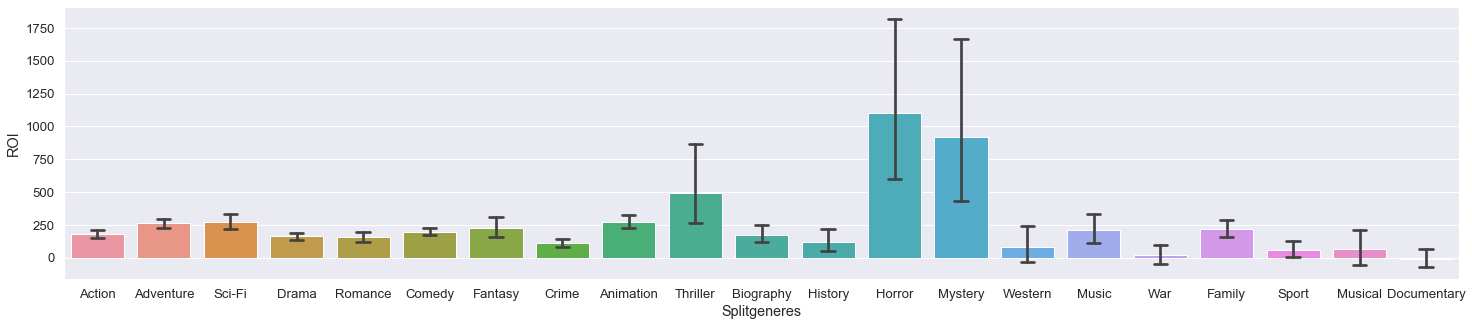

In [277]:
#barplot of ROI by genre
plt.figure(figsize=(25,5))
sns.barplot(x="Splitgeneres", y="ROI", data=df3, capsize=.2);

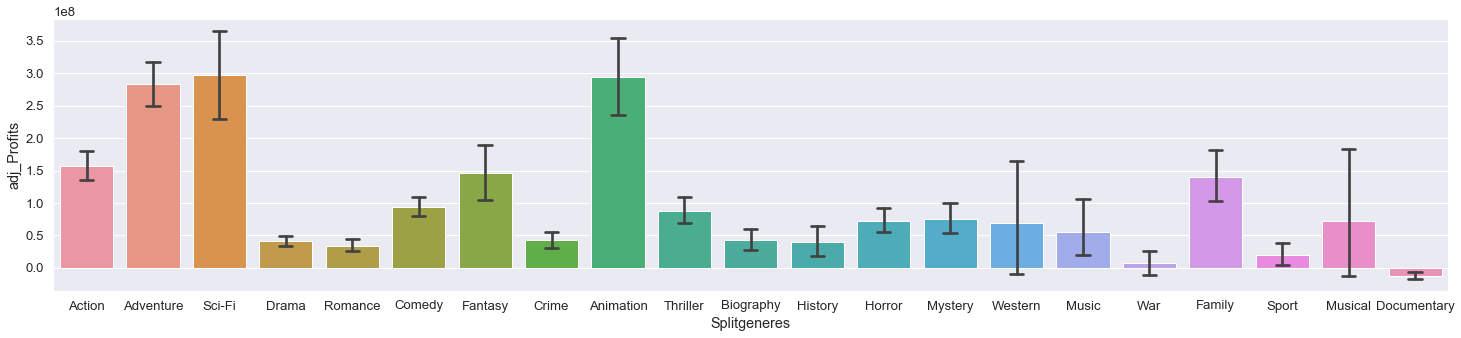

In [278]:
#barplot of Profit by genre
plt.figure(figsize=(25,5))
sns.barplot(x="Splitgeneres", y="adj_Profits", data=df3, capsize=.2);

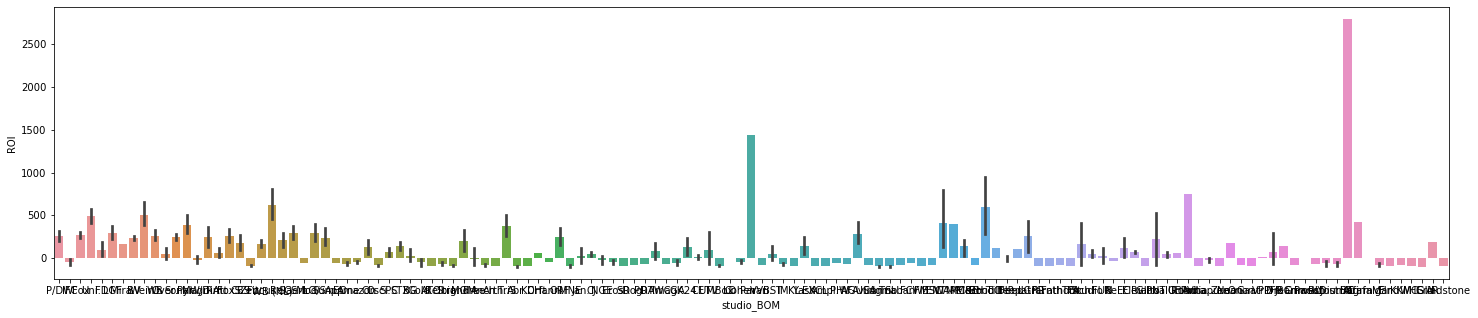

In [117]:
#barplot of ROI by studio
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="ROI", data=df4, capsize=.2);

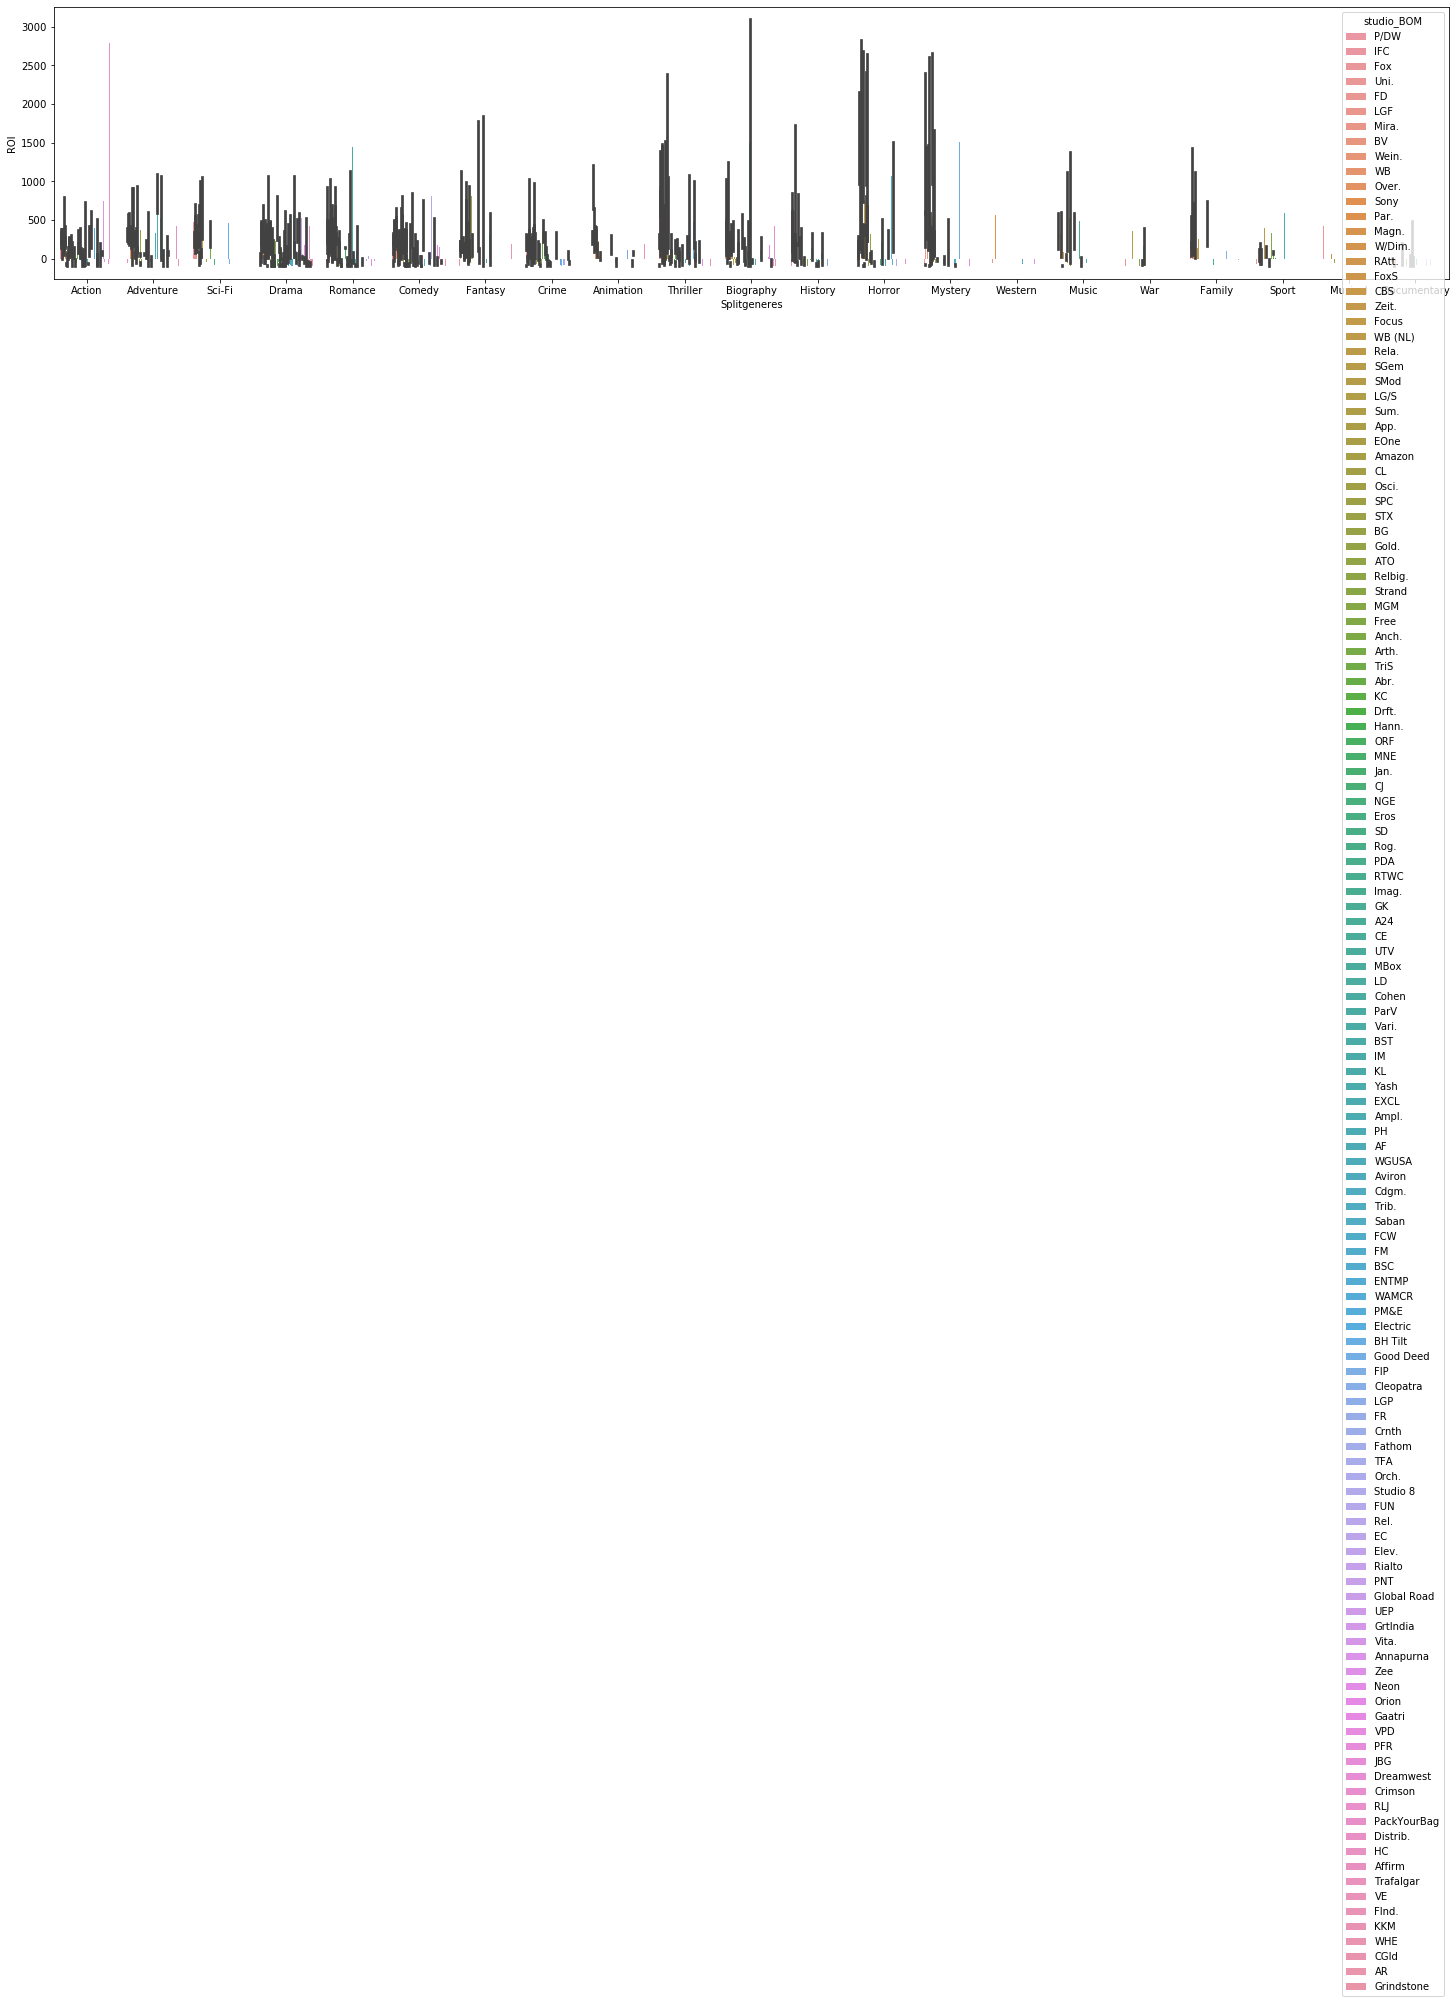

In [124]:
#barplot of ROI by studio
plt.figure(figsize=(25,5))
sns.barplot(x="Splitgeneres", y="ROI", hue="studio_BOM", data=df4);

In [142]:
list(df3.studio_BOM.unique())

['P/DW',
 'IFC',
 'Fox',
 'Uni.',
 'FD',
 'LGF',
 'Mira.',
 'BV',
 'Wein.',
 'WB',
 'Over.',
 'Sony',
 'Par.',
 'Magn.',
 'W/Dim.',
 'RAtt.',
 'FoxS',
 'CBS',
 'Zeit.',
 'Focus',
 'WB (NL)',
 'Rela.',
 'SGem',
 'SMod',
 'LG/S',
 'Sum.',
 'App.',
 'EOne',
 'Amazon',
 'CL',
 'Osci.',
 'SPC',
 'STX',
 'BG',
 'Gold.',
 'ATO',
 'Relbig.',
 'Strand',
 'MGM',
 'Free',
 'Anch.',
 'Arth.',
 'TriS',
 'Abr.',
 'KC',
 'Drft.',
 'Hann.',
 'ORF',
 'MNE',
 'Jan.',
 'CJ',
 'NGE',
 'Eros',
 'SD',
 'Rog.',
 'PDA',
 'RTWC',
 'Imag.',
 'GK',
 'A24',
 'CE',
 'UTV',
 'MBox',
 'LD',
 'Cohen',
 'ParV',
 'Vari.',
 'BST',
 'IM',
 'KL',
 'Yash',
 'EXCL',
 'Ampl.',
 'PH',
 'AF',
 'WGUSA',
 'Aviron',
 'Cdgm.',
 'Trib.',
 'Saban',
 'FCW',
 'FM',
 'BSC',
 'ENTMP',
 'WAMCR',
 'PM&E',
 'Electric',
 'BH Tilt',
 'Good Deed',
 'FIP',
 'Cleopatra',
 'LGP',
 'FR',
 'Crnth',
 'Fathom',
 'TFA',
 'Orch.',
 'Studio 8',
 'FUN',
 'Rel.',
 'EC',
 'Elev.',
 'Rialto',
 'PNT',
 'Global Road',
 'UEP',
 'GrtIndia',
 'Vita.',
 'Annapur

In [153]:
#Need to isolate the "top" studios (studios with top 20 ROIs)
ROIdf4 = df3[df3.studio_BOM != 'IFC']
df5 = df4[df4.studio_BOM != 'FD']
df6 = df5[df5.studio_BOM != 'Mira.']
df7 = df6[df6.studio_BOM != 'BV']
df8 = df7[df7.studio_BOM != 'Over.']
df9 = df8[df8.studio_BOM != 'Sony']
df10 = df9[df9.studio_BOM != 'Magn.']
df11 = df10[df10.studio_BOM != 'W/Dim.']
df12 = df11[df11.studio_BOM != 'RAtt.']
df13 = df12[df12.studio_BOM != 'CBS']
df14 = df13[df13.studio_BOM != 'Zeit.']
df15 = df14[df14.studio_BOM != 'Focus']
df16 = df15[df15.studio_BOM != 'Rela.']
df17 = df16[df16.studio_BOM != 'SMod']
df18 = df17[df17.studio_BOM != 'Sum.']
df19 = df18[df18.studio_BOM != 'App.']
df20 = df19[df19.studio_BOM != 'EOne']
df21 = df20[df20.studio_BOM != 'Amazon']
df22 = df21[df21.studio_BOM != 'CL']
df23 = df22[df22.studio_BOM != 'Osci.']
df24 = df23[df23.studio_BOM != 'SPC']
df25 = df24[df24.studio_BOM != 'STX']
df26 = df25[df25.studio_BOM != 'BG']
df27 = df26[df26.studio_BOM != 'Gold.']
df28 = df27[df27.studio_BOM != 'ATO']
df29 = df28[df28.studio_BOM != 'Relbig.']
df30 = df29[df29.studio_BOM != 'Strand']
df31 = df30[df30.studio_BOM != 'MGM']
df32 = df31[df31.studio_BOM != 'Free']
df33 = df32[df32.studio_BOM != 'Anch.']
df34 = df33[df33.studio_BOM != 'Arth.']
df35 = df34[df34.studio_BOM != 'Abr.']
df36 = df35[df35.studio_BOM != 'KC']
df37 = df36[df36.studio_BOM != 'Drft.']
df38 = df37[df37.studio_BOM != 'Hann.']
df39 = df38[df38.studio_BOM != 'ORF']
df40 = df39[df39.studio_BOM != 'MNE']
df41 = df40[df40.studio_BOM != 'Jan.']
df42 = df41[df41.studio_BOM != 'CJ']
df43 = df42[df42.studio_BOM != 'NGE']
df44 = df43[df43.studio_BOM != 'Eros']
df45 = df44[df44.studio_BOM != 'SD']
df46 = df45[df45.studio_BOM != 'Rog.']
df47 = df46[df46.studio_BOM != 'PDA']
df48 = df47[df47.studio_BOM != 'RTWC']
df49 = df48[df48.studio_BOM != 'Imag.']
df50 = df49[df49.studio_BOM != 'GK']
df51 = df50[df50.studio_BOM != 'A24']
df52 = df51[df51.studio_BOM != 'CE']
df53 = df52[df52.studio_BOM != 'UTV']
df54 = df53[df53.studio_BOM != 'MBox']
df55 = df54[df54.studio_BOM != 'LD']
df56 = df55[df55.studio_BOM != 'Cohen']
df57 = df56[df56.studio_BOM != 'Vari.']
df58 = df57[df57.studio_BOM != 'BST']
df59 = df58[df58.studio_BOM != 'IM']
df60 = df59[df59.studio_BOM != 'KL']
df61 = df60[df60.studio_BOM != 'Yash']
df62 = df61[df61.studio_BOM != 'EXCL']
df63 = df62[df62.studio_BOM != 'Ampl.']
df64 = df63[df63.studio_BOM != 'PH']
df65 = df64[df64.studio_BOM != 'AF']
df66 = df65[df65.studio_BOM != 'Aviron']
df67 = df66[df66.studio_BOM != 'Cdgm.']
df68 = df67[df67.studio_BOM != 'Trib.']
df69 = df68[df68.studio_BOM != 'Saban']
df70 = df69[df69.studio_BOM != 'FCW']
df71 = df70[df70.studio_BOM != 'FM']
df72 = df71[df71.studio_BOM != 'BSC']
df73 = df72[df72.studio_BOM != 'PM&E']
df74 = df73[df73.studio_BOM != 'Electric']
df75 = df74[df74.studio_BOM != 'Good Deed']
df76 = df75[df75.studio_BOM != 'FIP']
df77 = df76[df76.studio_BOM != 'Cleopatra']
df78 = df77[df77.studio_BOM != 'LGP']
df79 = df78[df78.studio_BOM != 'FR']
df80 = df79[df79.studio_BOM != 'Crnth']
df81 = df80[df80.studio_BOM != 'Fathom']
df82 = df81[df81.studio_BOM != 'TFA']
df83 = df82[df82.studio_BOM != 'Orch.']
df84 = df83[df83.studio_BOM != 'Studio 8']
df85 = df84[df84.studio_BOM != 'FUN']
df86 = df85[df85.studio_BOM != 'Rel.']
df87 = df86[df86.studio_BOM != 'EC']
df88 = df87[df87.studio_BOM != 'Elev.']
df89 = df88[df88.studio_BOM != 'Rialto']
df90 = df89[df89.studio_BOM != 'PNT']
df91 = df90[df90.studio_BOM != 'Global Road']
df92 = df91[df91.studio_BOM != 'UEP']
df93 = df92[df92.studio_BOM != 'Vita.']
df94 = df93[df93.studio_BOM != 'Annapurna']
df95 = df94[df94.studio_BOM != 'Zee']
df96 = df95[df95.studio_BOM != 'Neon']
df97 = df96[df96.studio_BOM != 'Orion']
df98 = df97[df97.studio_BOM != 'Gaatri']
df99 = df98[df98.studio_BOM != 'VPD']
df100 = df99[df99.studio_BOM != 'PFR']
df101 = df100[df100.studio_BOM != 'JBG']
df102 = df101[df101.studio_BOM != 'Dreamwest']
df103 = df102[df102.studio_BOM != 'Crimson']
df104 = df103[df103.studio_BOM != 'RLJ']
df105 = df104[df104.studio_BOM != 'PackYourBag']
df106 = df105[df105.studio_BOM != 'Distrib.']
df107 = df106[df106.studio_BOM != 'Trafalgar']
df108 = df107[df107.studio_BOM != 'VE']
df109 = df108[df108.studio_BOM != 'FInd.']
df110 = df109[df109.studio_BOM != 'KKM']
df111 = df110[df110.studio_BOM != 'WHE']
df112 = df111[df111.studio_BOM != 'CGld']
df113 = df112[df112.studio_BOM != 'AR']
df114 = df113[df113.studio_BOM != 'Grindstone']

df_top20studio = df114

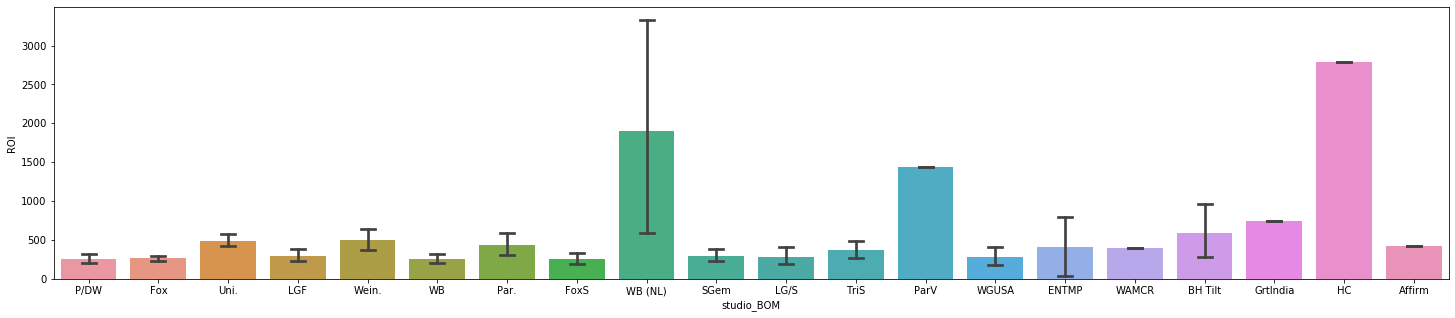

In [154]:
#barplot of ROI by top 20 studio
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="ROI", data=df_top20studio, capsize=.2);

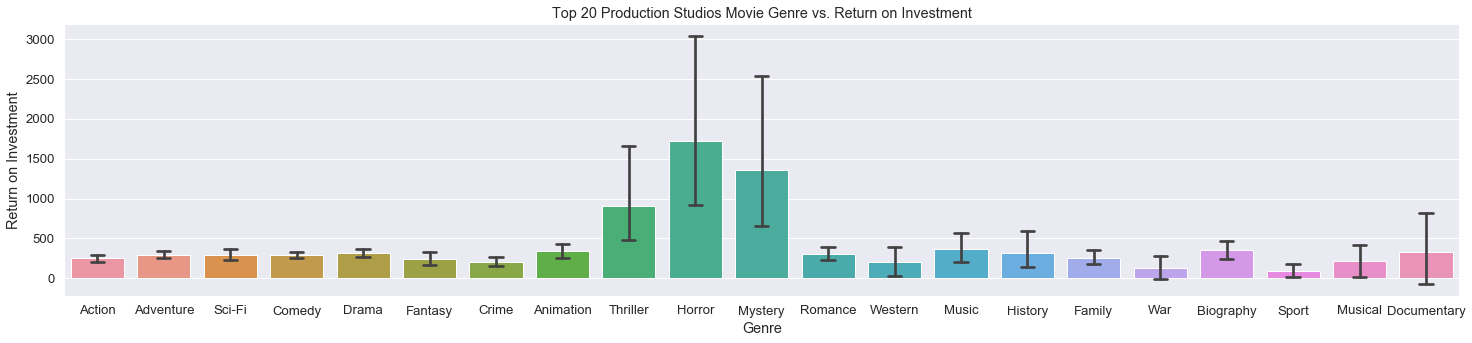

In [174]:
#barplot of ROI by genre
plt.figure(figsize=(25,5))
sns.set(font_scale=1.2)
ax = sns.barplot(x="Splitgeneres", y="ROI", data=df_top20studio, capsize=.2)
ax.set(title= "Top 20 Production Studios Movie Genre vs. Return on Investment", xlabel="Genre", ylabel = "Return on Investment");

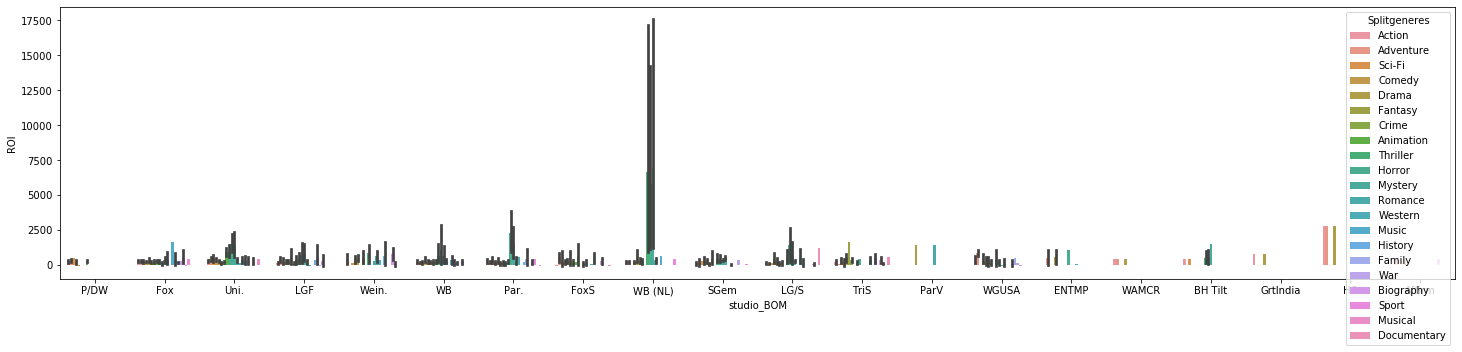

In [157]:
#barplot of ROI by studio by genre
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="ROI", hue="Splitgeneres", data=df_top20studio);

In [12]:
#Need to isolate the "top" studios (studios with top 20 profits)
df4 = df3[df3.studio_BOM != 'IFC']
df5 = df4[df4.studio_BOM != 'FD']
df6 = df5[df5.studio_BOM != 'Mira.']
df7 = df6[df6.studio_BOM != 'BH Tilt']
df8 = df7[df7.studio_BOM != 'Over.']
df9 = df8[df8.studio_BOM != 'ParV']
df10 = df9[df9.studio_BOM != 'Magn.']
df11 = df10[df10.studio_BOM != 'W/Dim.']
df12 = df11[df11.studio_BOM != 'RAtt.']
df13 = df12[df12.studio_BOM != 'CBS']
df14 = df13[df13.studio_BOM != 'Zeit.']
df15 = df14[df14.studio_BOM != 'Focus']
df16 = df15[df15.studio_BOM != 'Rela.']
df17 = df16[df16.studio_BOM != 'SMod']
df18 = df17[df17.studio_BOM != 'Affirm']
df19 = df18[df18.studio_BOM != 'App.']
df20 = df19[df19.studio_BOM != 'EOne']
df21 = df20[df20.studio_BOM != 'Amazon']
df22 = df21[df21.studio_BOM != 'CL']
df23 = df22[df22.studio_BOM != 'Osci.']
df24 = df23[df23.studio_BOM != 'SPC']
df25 = df24[df24.studio_BOM != 'STX']
df26 = df25[df25.studio_BOM != 'BG']
df27 = df26[df26.studio_BOM != 'Gold.']
df28 = df27[df27.studio_BOM != 'ATO']
df29 = df28[df28.studio_BOM != 'Relbig.']
df30 = df29[df29.studio_BOM != 'Strand']
df31 = df30[df30.studio_BOM != 'ENTMP']
df32 = df31[df31.studio_BOM != 'Free']
df33 = df32[df32.studio_BOM != 'Anch.']
df34 = df33[df33.studio_BOM != 'Arth.']
df35 = df34[df34.studio_BOM != 'Abr.']
df36 = df35[df35.studio_BOM != 'KC']
df37 = df36[df36.studio_BOM != 'Drft.']
df38 = df37[df37.studio_BOM != 'Hann.']
df39 = df38[df38.studio_BOM != 'ORF']
df40 = df39[df39.studio_BOM != 'MNE']
df41 = df40[df40.studio_BOM != 'Jan.']
df42 = df41[df41.studio_BOM != 'CJ']
df43 = df42[df42.studio_BOM != 'NGE']
df44 = df43[df43.studio_BOM != 'Eros']
df45 = df44[df44.studio_BOM != 'SD']
df46 = df45[df45.studio_BOM != 'Rog.']
df47 = df46[df46.studio_BOM != 'PDA']
df48 = df47[df47.studio_BOM != 'RTWC']
df49 = df48[df48.studio_BOM != 'Imag.']
df50 = df49[df49.studio_BOM != 'GK']
df51 = df50[df50.studio_BOM != 'A24']
df52 = df51[df51.studio_BOM != 'CE']
df53 = df52[df52.studio_BOM != 'UTV']
df54 = df53[df53.studio_BOM != 'MBox']
df55 = df54[df54.studio_BOM != 'LD']
df56 = df55[df55.studio_BOM != 'Cohen']
df57 = df56[df56.studio_BOM != 'Vari.']
df58 = df57[df57.studio_BOM != 'BST']
df59 = df58[df58.studio_BOM != 'IM']
df60 = df59[df59.studio_BOM != 'KL']
df61 = df60[df60.studio_BOM != 'Yash']
df62 = df61[df61.studio_BOM != 'EXCL']
df63 = df62[df62.studio_BOM != 'Ampl.']
df64 = df63[df63.studio_BOM != 'PH']
df65 = df64[df64.studio_BOM != 'AF']
df66 = df65[df65.studio_BOM != 'Aviron']
df67 = df66[df66.studio_BOM != 'Cdgm.']
df68 = df67[df67.studio_BOM != 'Trib.']
df69 = df68[df68.studio_BOM != 'Saban']
df70 = df69[df69.studio_BOM != 'FCW']
df71 = df70[df70.studio_BOM != 'FM']
df72 = df71[df71.studio_BOM != 'BSC']
df73 = df72[df72.studio_BOM != 'PM&E']
df74 = df73[df73.studio_BOM != 'Electric']
df75 = df74[df74.studio_BOM != 'Good Deed']
df76 = df75[df75.studio_BOM != 'FIP']
df77 = df76[df76.studio_BOM != 'Cleopatra']
df78 = df77[df77.studio_BOM != 'LGP']
df79 = df78[df78.studio_BOM != 'FR']
df80 = df79[df79.studio_BOM != 'Crnth']
df81 = df80[df80.studio_BOM != 'Fathom']
df82 = df81[df81.studio_BOM != 'TFA']
df83 = df82[df82.studio_BOM != 'Orch.']
df84 = df83[df83.studio_BOM != 'Studio 8']
df85 = df84[df84.studio_BOM != 'FUN']
df86 = df85[df85.studio_BOM != 'Rel.']
df87 = df86[df86.studio_BOM != 'EC']
df88 = df87[df87.studio_BOM != 'Elev.']
df89 = df88[df88.studio_BOM != 'Rialto']
df90 = df89[df89.studio_BOM != 'PNT']
df91 = df90[df90.studio_BOM != 'Global Road']
df92 = df91[df91.studio_BOM != 'UEP']
df93 = df92[df92.studio_BOM != 'Vita.']
df94 = df93[df93.studio_BOM != 'Annapurna']
df95 = df94[df94.studio_BOM != 'Zee']
df96 = df95[df95.studio_BOM != 'Neon']
df97 = df96[df96.studio_BOM != 'Orion']
df98 = df97[df97.studio_BOM != 'Gaatri']
df99 = df98[df98.studio_BOM != 'VPD']
df100 = df99[df99.studio_BOM != 'PFR']
df101 = df100[df100.studio_BOM != 'JBG']
df102 = df101[df101.studio_BOM != 'Dreamwest']
df103 = df102[df102.studio_BOM != 'Crimson']
df104 = df103[df103.studio_BOM != 'RLJ']
df105 = df104[df104.studio_BOM != 'PackYourBag']
df106 = df105[df105.studio_BOM != 'Distrib.']
df107 = df106[df106.studio_BOM != 'Trafalgar']
df108 = df107[df107.studio_BOM != 'VE']
df109 = df108[df108.studio_BOM != 'FInd.']
df110 = df109[df109.studio_BOM != 'KKM']
df111 = df110[df110.studio_BOM != 'WHE']
df112 = df111[df111.studio_BOM != 'CGld']
df113 = df112[df112.studio_BOM != 'AR']
df114 = df113[df113.studio_BOM != 'Grindstone']

df_top20studio0 = df114

In [171]:
df_top19studio = df_top20studio0[df_top20studio0.studio_BOM != 'Fox']
df_top18studio = df_top19studio[df_top19studio.studio_BOM != 'WB (NL)']
df_top17studio = df_top18studio[df_top18studio.studio_BOM != 'Sony']
df_top16studio = df_top17studio[df_top17studio.studio_BOM != 'Par.']
df_top15studio = df_top16studio[df_top16studio.studio_BOM != 'WB']
df_top14studio = df_top15studio[df_top15studio.studio_BOM != 'Sum.']
df_top13studio = df_top14studio[df_top14studio.studio_BOM != 'MGM']
df_top12studio = df_top13studio[df_top13studio.studio_BOM != 'WAMCR']
df_top11studio = df_top12studio[df_top12studio.studio_BOM != 'LG/S']
df_top10studio = df_top11studio[df_top11studio.studio_BOM != 'LGF']
df_top9studio = df_top10studio[df_top10studio.studio_BOM != 'Wein.']
df_top8studio = df_top9studio[df_top9studio.studio_BOM != 'SGem']
df_top7studio = df_top8studio[df_top8studio.studio_BOM != 'TriS']
df_top6studio = df_top7studio[df_top7studio.studio_BOM != 'WGUSA']
df_top5studio = df_top6studio[df_top6studio.studio_BOM != 'FoxS']
df_top4studio = df_top5studio[df_top5studio.studio_BOM != 'HC']
df_top3studio = df_top4studio[df_top4studio.studio_BOM != 'GrtIndia']
df_top3studio['studio_BOM'].replace({'P/DW': 'DreamWorks', 'Uni.':'Universal Pictures', 'BV': 'Disney'}, inplace=True)
df_top3studio.rename(columns={'Splitgeneres': 'Genre','studio_BOM': 'Production Studio'}, inplace=True)
df_top3studio

/Users/tlipman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/tlipman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


ROI  adj_Profits_millions   Production Studio  \
tconst                                                             
tt1399103   476.304656           1097.452777          DreamWorks   
tt1399103   476.304656           1097.452777          DreamWorks   
tt1399103   476.304656           1097.452777          DreamWorks   
tt0365907   110.122800             35.363302  Universal Pictures   
tt0365907   110.122800             35.363302  Universal Pictures   
...                ...                   ...                 ...   
tt1691917  1100.614405            252.826962              Disney   
tt1691917  1100.614405            252.826962              Disney   
tt4191054   -31.766168             -7.037461              Disney   
tt4191054   -31.766168             -7.037461              Disney   
tt4191054   -31.766168             -7.037461              Disney   

                             primaryTitle      Genre   adj_Profits  
tconst                                                              
tt1399103  Transformers: Dark of the Moon     Action  1.097453e+09  
tt1399103  Transformers: Dark of the Moon  Adventure  1.097453e+09  
tt1399103  Transformers: Dark of the Moon     Sci-Fi  1.097453e+09  
tt0365907     A Walk Among the Tombstones     Action  3.536330e+07  
tt0365907     A Walk Among the Tombstones      Crime  3.536330e+07  
...                                   ...        ...           ...  
tt1691917                          Planes  Animation  2.528270e+08  
tt1691917                          Planes     Comedy  2.528270e+08  
tt4191054                   Strange Magic  Adventure -7.037461e+06  
tt4191054                   Strange Magic  Animation -7.037461e+06  
tt4191054                   Strange Magic     Comedy -7.037461e+06  

[583 rows x 6 columns]

In [173]:
df3.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False)

ROI  adj_Profits_millions   adj_Profits
Splitgeneres                                                 
Sci-Fi         274.797482            297.996277  2.979963e+08
Animation      272.453786            293.901314  2.939013e+08
Adventure      261.728619            283.232454  2.832325e+08
Action         179.216786            156.845824  1.568458e+08
Fantasy        229.749700            146.079222  1.460792e+08
Family         221.445405            139.267449  1.392674e+08
Comedy         199.151322             93.950151  9.395015e+07
Thriller       492.214778             86.875416  8.687542e+07
Mystery        918.220372             74.669463  7.466946e+07
Musical         65.440359             72.306747  7.230675e+07
Horror        1099.065496             71.943122  7.194312e+07
Western         82.205385             68.347737  6.834774e+07
Music          212.322683             54.517293  5.451729e+07
Biography      175.367676             43.044562  4.304456e+07
Crime          111.039044             42.256597  4.225660e+07
Drama          164.798363             41.360967  4.136097e+07
History        123.421795             39.873731  3.987373e+07
Romance        156.204234             34.255721  3.425572e+07
Sport           60.380273             20.498143  2.049814e+07
War             20.678523              7.042421  7.042421e+06
Documentary     -9.600322            -12.312933 -1.231293e+07

In [350]:
df2.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False)

ROI  adj_Profits_millions   adj_Profits
Splitgeneres                                                 
Adventure      220.969818            227.716142  2.277161e+08
Sci-Fi         204.231951            203.452591  2.034526e+08
Animation      201.164651            192.254291  1.922543e+08
Fantasy        225.331233            138.374992  1.383750e+08
Family         188.719265            133.171500  1.331715e+08
Action         146.546143            128.946458  1.289465e+08
Musical         55.466339             76.483886  7.648389e+07
Comedy         134.784818             65.233854  6.523385e+07
Thriller       272.911349             55.270375  5.527037e+07
Mystery       3779.116664             47.883230  4.788323e+07
Horror        3441.725035             39.083848  3.908385e+07
Crime           66.537147             29.377069  2.937707e+07
Romance        107.214084             25.064498  2.506450e+07
Music          178.474579             23.526018  2.352602e+07
Drama           85.758060             22.984534  2.298453e+07
Biography       89.037768             22.499094  2.249909e+07
Western        -15.813940             19.459012  1.945901e+07
Sport          164.217183             17.754079  1.775408e+07
History         48.808374             15.696646  1.569665e+07
War             14.705459              8.418076  8.418076e+06
News           903.271043              0.447322  4.473215e+05
Documentary     -2.123536            -10.872731 -1.087273e+07

In [14]:
df_top20studio0.groupby(['Splitgeneres']).mean().sort_values(by='adj_Profits', ascending=False)

ROI  adj_Profits_millions   adj_Profits
Splitgeneres                                                 
Animation      333.089081            361.032095  3.610321e+08
Sci-Fi         291.505371            349.973653  3.499737e+08
Adventure      295.434868            341.960769  3.419608e+08
Action         245.257286            230.598485  2.305985e+08
Fantasy        225.441538            190.193155  1.901932e+08
Musical        221.850302            179.784411  1.797844e+08
Western        238.510507            169.767075  1.697671e+08
Family         243.657251            155.301853  1.553019e+08
Thriller       827.357483            147.780256  1.477803e+08
Comedy         282.376119            147.483392  1.474834e+08
Horror        1742.449345            116.646208  1.166462e+08
Mystery       1334.131219            113.534110  1.135341e+08
Music          372.195196            111.397741  1.113977e+08
Biography      312.120300             88.495418  8.849542e+07
History        275.169588             87.659781  8.765978e+07
Drama          292.925408             86.790034  8.679003e+07
Crime          200.900008             81.083024  8.108302e+07
Romance        288.424260             80.024433  8.002443e+07
War            134.591346             35.329503  3.532950e+07
Sport           88.662113             33.177977  3.317798e+07
Documentary    230.137154              9.394937  9.394937e+06

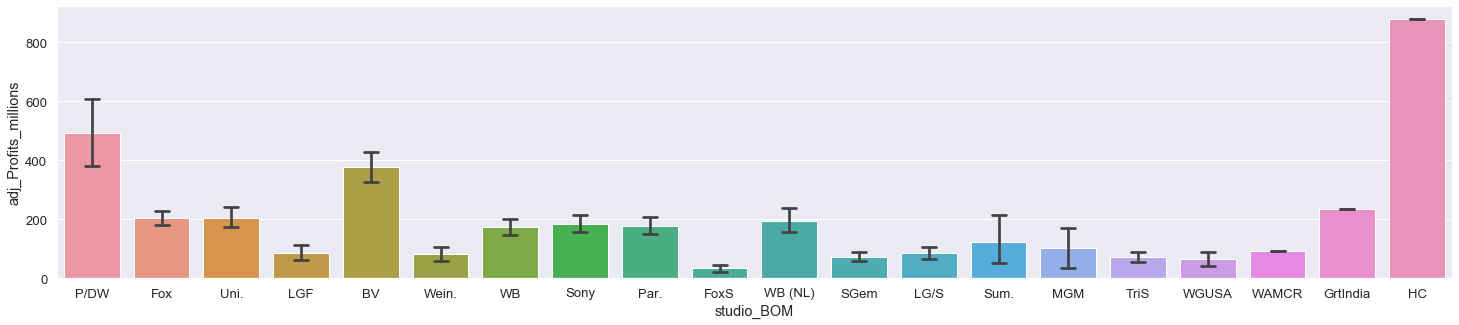

In [282]:
#barplot of Profit by top 20 studio
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="adj_Profits_millions", data=df_top20studio, capsize=.2);

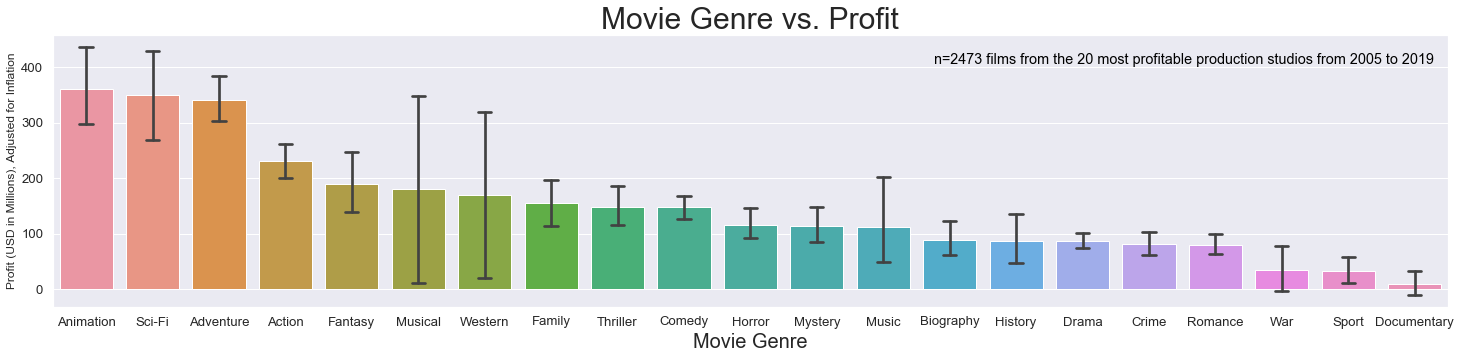

In [324]:
#barplot of profits by genre
plt.figure(figsize=(25,5))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.barplot(x="Splitgeneres", y="adj_Profits_millions",
                 data=df_top20studio, capsize=.2,
                 order=["Animation", "Sci-Fi", "Adventure", "Action", "Fantasy", "Musical", "Western",
                        "Family", "Thriller", "Comedy", "Horror", "Mystery", "Music", "Biography",
                        "History", "Drama", "Crime", "Romance", "War", "Sport", "Documentary"])
ax.set_title('Movie Genre vs. Profit', fontsize=30)
ax.set_xlabel('Movie Genre', fontsize=20)
ax.set_ylabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=12)
ax.text(.99, .935, 'n=2473 films from the 20 most profitable production studios from 2005 to 2019', color='black',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);

In [ ]:
# COMMENTS: Animation, Sci-Fi, and Adventure are the top performers.
# Huge error bars for Musical, Western, and Music. Going to remove

In [347]:
df_top20studio1 = df_top20studio0[df_top20studio0.Splitgeneres != 'Musical']
df_top20studio2 = df_top20studio1[df_top20studio1.Splitgeneres != 'Western']
df_top20studio3 = df_top20studio2[df_top20studio2.Splitgeneres != 'Music']
df_top20studio3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2441 entries, tt1399103 to tt7870578
Data columns (total 6 columns):
ROI                     2441 non-null float64
adj_Profits_millions    2441 non-null float64
studio_BOM              2441 non-null object
primaryTitle            2441 non-null object
Splitgeneres            2441 non-null object
adj_Profits             2441 non-null float64
dtypes: float64(3), object(3)
memory usage: 133.5+ KB


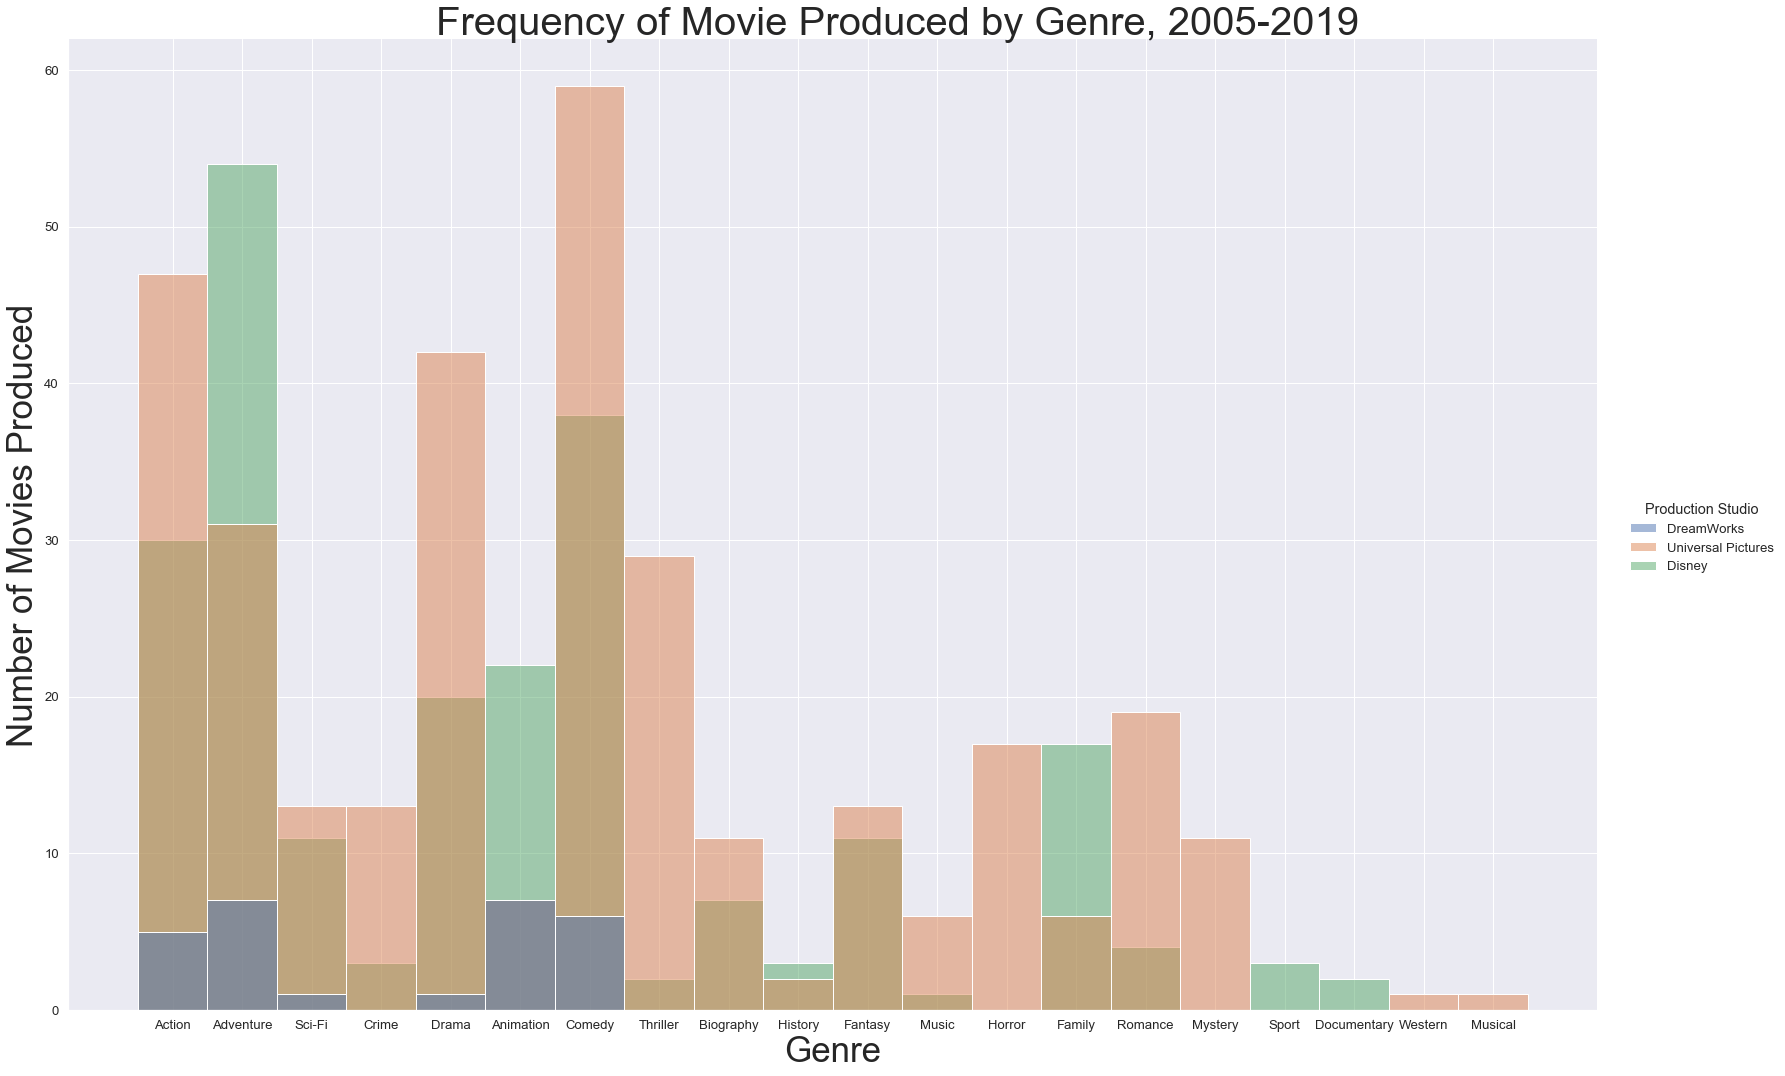

In [197]:
#Histogram of top 3 most profitable studios and the types of movies they produce
g = sns.displot(data=df_top3studio, x="Genre", hue="Production Studio",
            height=15, color="husl", aspect=1.5)
g.set_xlabels('Genre', fontsize=35)
g.set_ylabels('Number of Movies Produced', fontsize=35)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Frequency of Movie Produced by Genre, 2005-2019', fontsize=40);

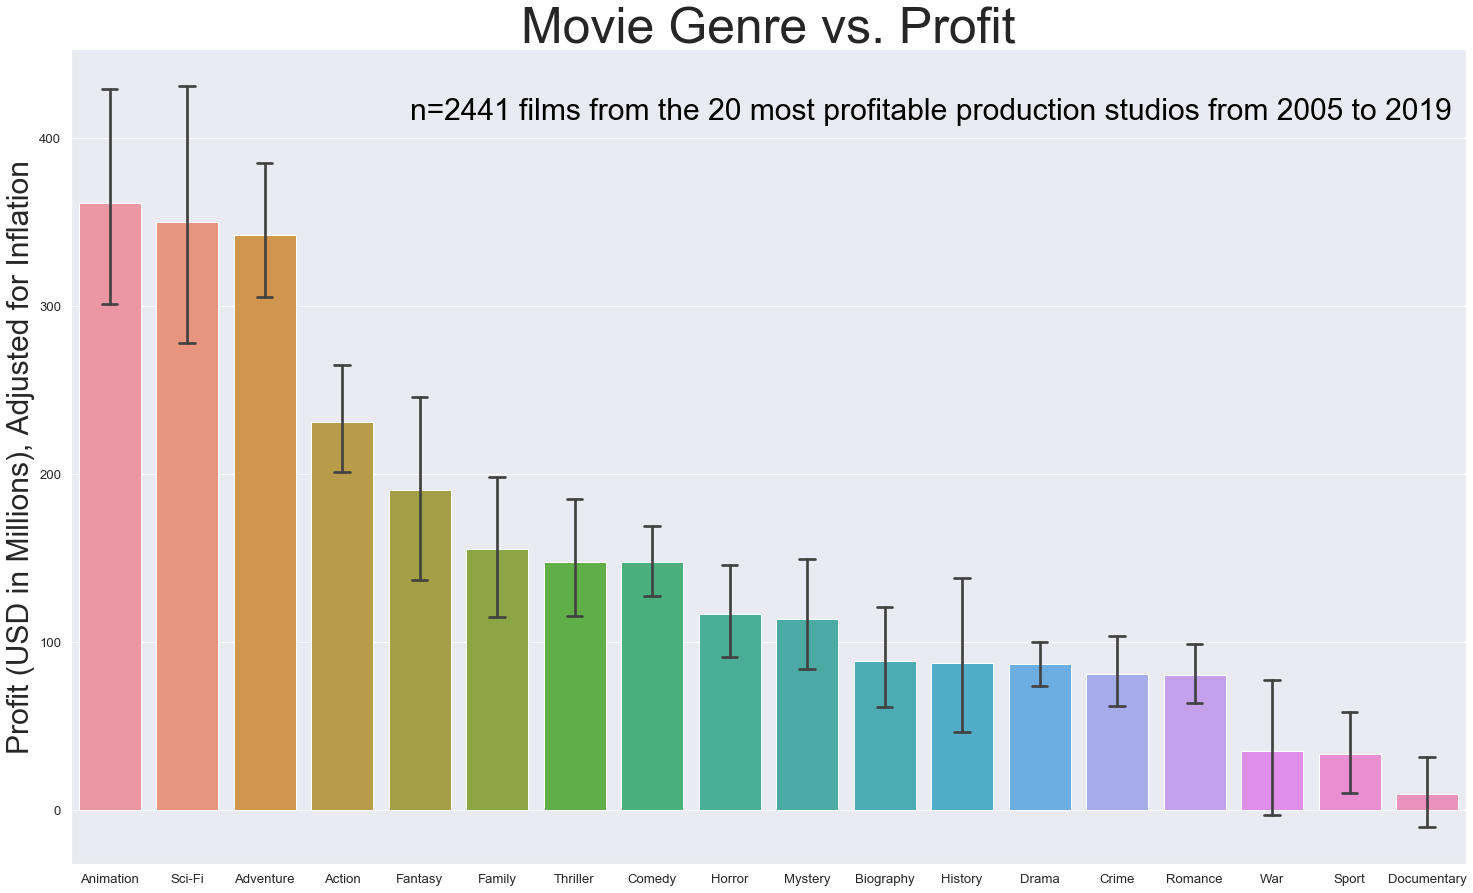

In [348]:
#barplot of profits by genre
plt.figure(figsize=(25,15))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.barplot(x="Splitgeneres", y="adj_Profits_millions",
                 data=df_top20studio3, capsize=.2,
                 order=["Animation", "Sci-Fi", "Adventure", "Action", "Fantasy", "Family",
                        "Thriller", "Comedy", "Horror", "Mystery", "Biography", "History",
                        "Drama", "Crime", "Romance", "War", "Sport", "Documentary"])
ax.set_title('Movie Genre vs. Profit', fontsize=50)
ax.set_ylabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=30)
ax.set_xlabel('', fontsize=1)
ax.text(.99, .94, 'n=2441 films from the 20 most profitable production studios from 2005 to 2019',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);

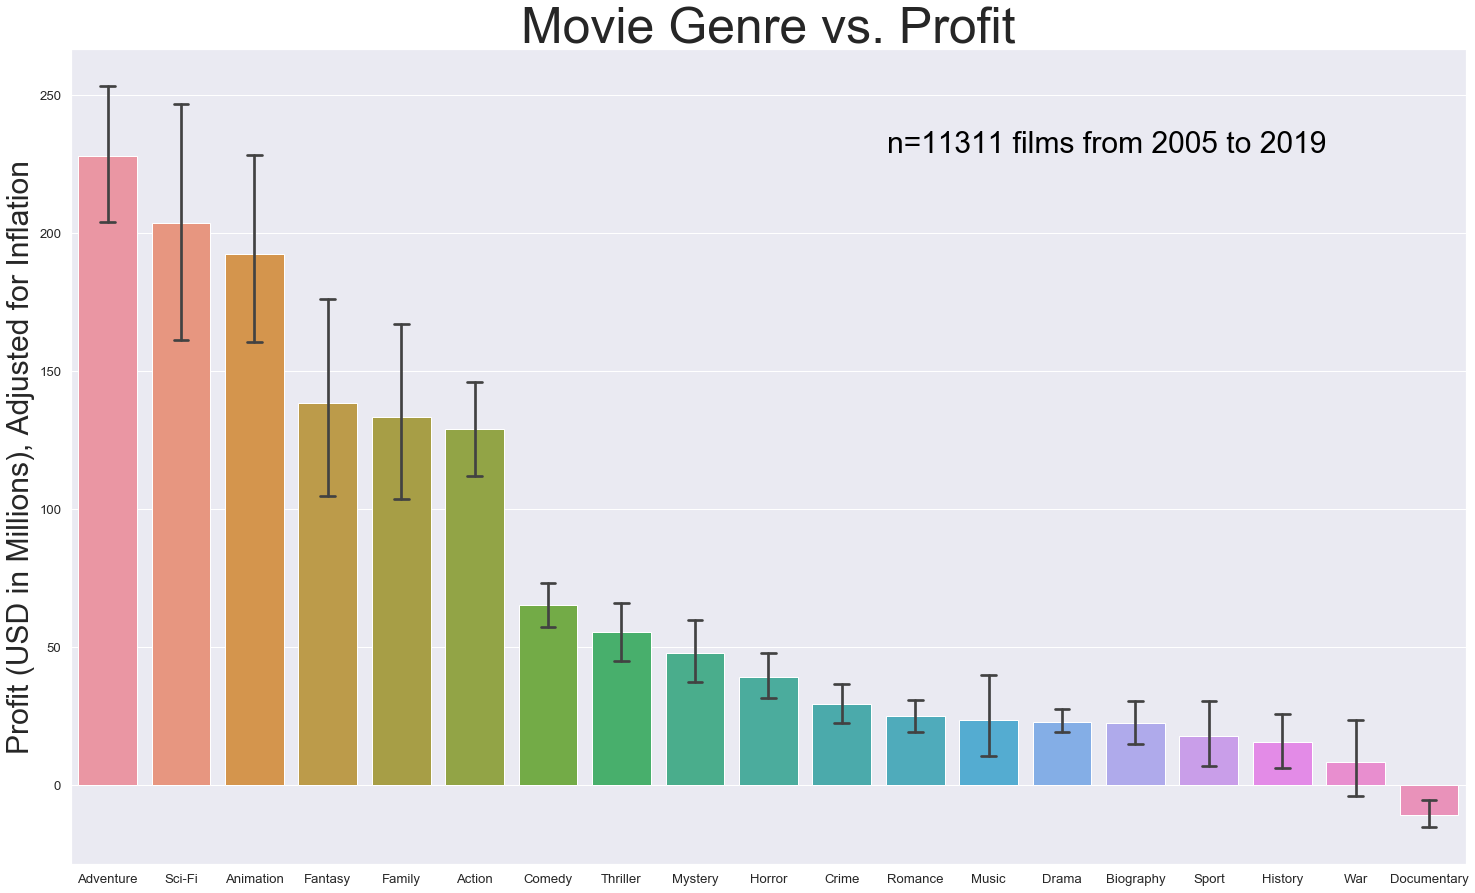

In [354]:
#barplot of profits by genre
plt.figure(figsize=(25,15))
sns.set(font_scale=1.2)
pal = sns.color_palette("husl", 8)
ax = sns.barplot(x="Splitgeneres", y="adj_Profits_millions",
                 data=df2, capsize=.2,
                 order=["Adventure", "Sci-Fi", "Animation", "Fantasy", "Family",
                        "Action", "Comedy", "Thriller", "Mystery", "Horror", "Crime",
                        "Romance", "Music", "Drama", "Biography", "Sport", "History",
                        "War", "Documentary"])
ax.set_title('Movie Genre vs. Profit', fontsize=50)
ax.set_ylabel('Profit (USD in Millions), Adjusted for Inflation', fontsize=30)
ax.set_xlabel('', fontsize=1)
ax.text(.9, .9, 'n=11311 films from 2005 to 2019',
        color='black', fontsize=30,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes);